# Bikeshare Data

## Importing libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Data Analysis

In [61]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The data ranges from 18 to 64 years age range.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in our sample data.

In [65]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [66]:
cat_cols = ['sex', 'children', 'smoker', 'region']

In [67]:
df[cat_cols] = df[cat_cols].astype('category')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.4 KB


Great, we converted all the object data types to categorical.

> ---

## Data Visualisation

In [69]:
class dataVisualisation:

    def __init__(self, df, style='darkgrid'):
        self.df = df
        self.style = style
        sns.set_style(style)

    def plot_boxplot(self, x_column = None, y_column = None, hue = None, col = None, palette='husl'):
        """
        Input: Takes in x_column, y_column, hue and col.
        Output: Outputs a boxplot.
        """
        graph = sns.catplot(x = x_column, y = y_column, data = self.df,
                            hue = hue, col = col, kind = "box", 
                            legend = False, palette= palette)

        plt.xlabel(x_column)
        plt.ylabel("FRQ")
        plt.show()

    def plot_displot(self, x_column = None, bins = None, kde = None, hue = None, col = None, multiple = 'stack', palette='husl'):
        """Input: Takes in x_column, bins size, kde, hue and col.
        Output: Outputs a displot.
        """
        graph = sns.displot(x = x_column, bins = bins, data = self.df,
                            hue = hue, col = col, kde = kde
                            , multiple = multiple, palette=palette)
        plt.xlabel(x_column)
        plt.ylabel("Count")
        plt.show()

    def plot_countplot(self, column = None, hue = None, rotation = None):
        """
        Input: Takes in column and hue.
        Output: Displays a countplot.
        """
        graph = sns.countplot(x = column, data = self.df, hue = column,
                              order = df[column].value_counts().index,
                              legend=False)
        
        for container in graph.containers:
            graph.bar_label(container)
        plt.xticks(rotation=45)
        plt.show()

    def plot_lineplot(self, x_column = None, y_column = None, hue = None, markers = True, rotation=0):
        """
        Input: Takes in x_column, y_column, hue, markers and rotation.
        Output: Displays a lineplot.
        """
        graph = sns.lineplot(x=x_column, y=y_column, data = self.df, hue = hue,
                             marker = 'o' if markers else None, linewidth=2)
        
        plt.xticks(rotation=rotation)
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f"{y_column} vs. {x_column}")
        if hue:
            plt.legend(title='Hue' if hue else None)
        plt.show()

    def plot_piechart(self, column_name, autopct = '%1.2f%%', startangle = 90, shadow=True):
        """
        Input: Takes in column name (categorical).
        Output: Displays a pie-chart.
        """
        counts = self.df[column_name].value_counts()
        graph = plt.pie(counts, labels=counts.index, startangle=startangle,
                        autopct=autopct, shadow=shadow, counterclock=False)
        
        plt.axis("equal")
        plt.title(f"Distribution of {column_name}")
        plt.tight_layout
        plt.show()

In [70]:
viz = dataVisualisation(df = df)

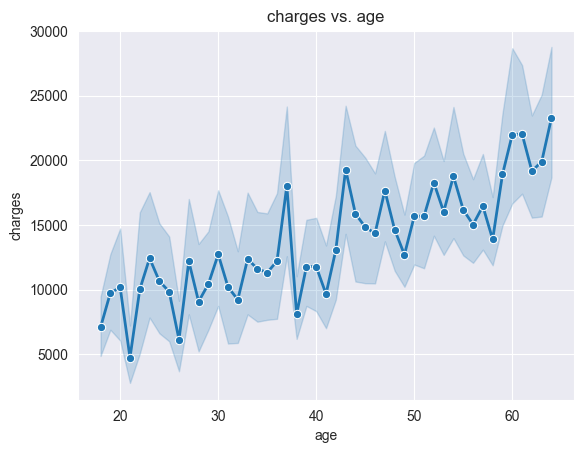

In [71]:
viz.plot_lineplot('age', 'charges');
plt.show()

We can see that as age goes up, the medical costs go up as well.

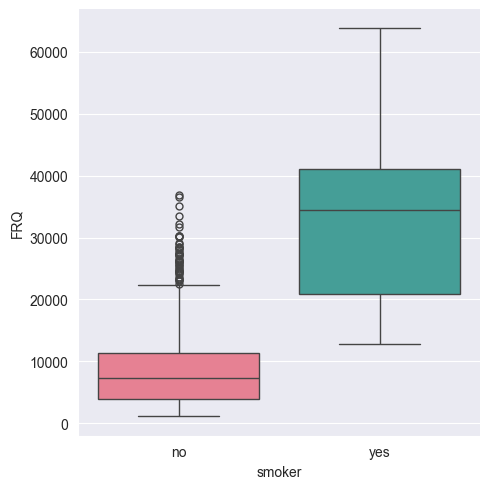

In [72]:
viz.plot_boxplot('smoker', 'charges', hue='smoker');
plt.show()

Smokers had much higher medical costs.

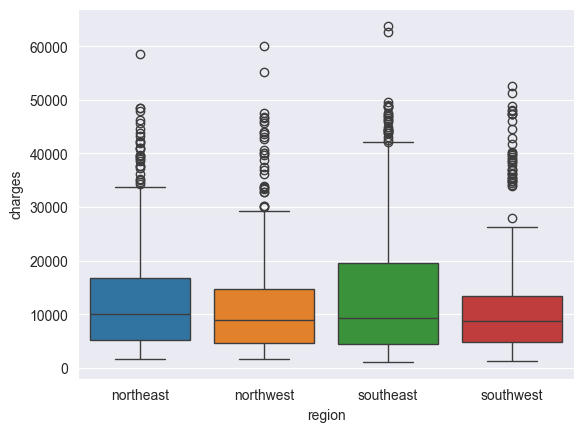

In [73]:
sns.boxplot(x='region', y='charges', hue='region', data=df)
plt.show()

The data is well distrubuted across regions.

> ---

## ML preprocessing and Model Implementation

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
X = df.drop('charges', axis=1)
y = df['charges']

In [76]:
X = pd.get_dummies(X, drop_first=True)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.4, random_state=0
)

### Polynomial Regression

In [84]:
for i in range(1, 4):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    y_pred_poly = poly_reg.predict(X_test_poly)

    print(f"Accuracy (degree = {i}): {mean_squared_error(y_test, y_pred_poly)}")

Accuracy (degree = 1): 32904204.564240143
Accuracy (degree = 2): 20026395.43282554
Accuracy (degree = 3): 70027223.42292236


Using quadratic here yields us the least MSE.